# Gender check of occupational title with NB-BERT
Who is most likley a 'rørlegger'(plumber), a he or she? 

Using MASKED word prediction trough a pipe with NB-BERT to find out.

How does it work:
Checking if either 'han'(male) or 'hun'(female) is the most likley match for the masked word.

Occupation list is from here:
https://studievalg.no/yrker

By: Marius Heier / mariusheier1981@gmail.com



In [1]:
!pip install -q transformers
from transformers import pipeline

model = 'NbAiLab/nb-bert-base' #@param ["NbAiLab/nb-bert-base", "bert-base-multilingual-cased","bert-base-cased","ltgoslo/norbert"]
pipe = pipeline('fill-mask', model=model)

     |████████████████████████████████| 2.9 MB 2.8 MB/s 
     |████████████████████████████████| 895 kB 37.0 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 23.4 MB/s 


Downloading:   0%|          | 0.00/746 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at NbAiLab/nb-bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [2]:
def check_yrke(yrke):
  text = '[MASK] er {}'.format(yrke)

  # Preset values

  han = 0
  hun = 0

  return_list = []
  predictions = pipe(text)

  
  for prediction in predictions:

    # Check if han is in data
    if prediction['token_str'].lower() == 'han':
      han = prediction['score']
    
    # Check if hun is in data
    if prediction['token_str'].lower() == 'hun':
      hun = prediction['score']
  return han,hun



In [3]:
text = '''
Annet fagområde
Astronaut
Avisbud
Befal i forsvaret
Brannkonstabel
Bussjåfør
Dekksoffiser
Flygeleder
Flyger
Flyinstruktør
Forsker
Instruktør
Konsulent
Lokfører
Modell
Mystery Shopper
Nattevakt
Offiser
Ombordansvarlig
Postbud
Pølsemaker
Renholdsoperatør
Røykdykker
Sjøoffiser
Sjåfør
Stipendiat
Toller
Trainee
Trikkefører
Vaktmester / Driftstekniker
Vekter
Yrkesdykker
Estetiske fag, kunst- og musikkfag
Akkompagnatør
Akustiker
Animatør
Billedkunstner
Blomsterdekoratør
Bunadtilvirker
Buntmaker
Dansepedagog
Danser
Dekoratør
Dirigent
Dramaturg
Duodjar
Forgyller
Fotograf
Frisør
Gallerist
Garnframstiller
Garver
Gjørtler
Grafisk designer
Gravør
Herreskredder
Håndvever
Illustratør
Inspisient
Interiørarkitekt
Interiørkonsulent
Kantor / Kirkemusiker
Keramiker
Kjole- og draktsyer
Klesdesigner / Kostymedesigner
Komponist
Koreograf
Kostymesyer
Kunst- og kulturformidler
Kunsthåndverker
Kunstner
Kurator
Kurvmaker
Lydkunstner
Lysdesigner
Lystekniker
Make Up Artist
Maskør- og parykkmaker
Mediedesigner
Mediegrafiker
Modist
Musiker
Musikkprodusent
Musikkterapeut
Møbeldesigner
Negldesigner
Organist
Pianostemmer
Produktdesigner
Rekvisitør
Sanger
Scenograf
Skuespiller
Sminkør
Strikkehåndverker
Stylist
Sølvsmed
Tekstildesigner
Treskjærer
Utstillingsdesigner
Videokunstner
Fiskeri-, husdyr- og landbruksfag
Agronom
Anleggsgartner
Bonde
Fagarbeider i sjømatproduksjon
Fiskeoppdretter
Fisker
Fylkesjordsjef
Fylkesskogmester
Fylkesskogsjef
Gartner
Hestefaglært
Hortonom
Hovslager
Iktyolog
Jordbrukssjef
Naturforvalter
Nettmann
Ornitolog
Reindriftsutøver
Ridelærer
Skogbrukssjef
Skogsoperatør
Slakter
Utmarkskonsulent
Historie, religion, idéfag
Arkeolog
Byantikvar
Diakon
Etnolog / Kulturhistoriker
Eurytmist
Filosof
Historiker
Idehistoriker
Institusjonsprest
Kateket
Kirketjener
Konservator og arkivar
Kunsthistoriker
Misjonær
Palentolog
Prest / Teolog
Hotell- og reiselivsfag
Baker
Barista
Bartender
Guide
Hotell og resturantsadministrator
Hotellsjef
Hovmester
Institusjonskokk
Kabinpersonale
Kjøkkenmedarbeider
Kjøkkensjef
Kokk
Konditor
Pikkolo
Reisekonsulent
Reiseleder
Reiselivskoordinator
Resepsjonist
Restaurantsjef
Servitør
Turistguide
Vinkelner / Sommelier
Idrettsfag, kroppsøving og friluftsliv
Idrettskonsulent
Idrettstrener
Personlig trener
Profesjonell idrettsutøver
Informasjonsteknologi og informatikk
Databasekonsulent / Databaseutvikler
Dataingeniør
IKT-Servicemedarbeider
Infrastruktur-arkitekt
Infrastruktur-konsulent
Integrasjonsarkitekt
Interaksjonsdesigner
IT-arkitekt
IT-driftskonsulent
IT-Konsulent
IT-sjef
Kvalitetssikrer / Qa Ingeniør
MAC designer
Microsoft- arkitekt
Microsoftutvikler
Nettverks og systemadministrator
Programmerer
Programmerer .Net
Programmerer C++
Programmerer Java
Programmerer PHP
Programutvikler / Softwareutvikler
Prosjektleder IT
SAP-Konsulent
Sikkerhetskonsulent
Spilldesigner
Spillprogrammerer
Systemarkitekt
Systemkonsulent
Systemutvikler
Teknisk Support IT / Helpdesk
Webadministrator / Webmaster
Webdesigner / Webutvikler
Jus
Advokat
Advokatfullmektig
Advokatsekretær
Compliance officer
Dommer
Dommerfullmektig
Domstolsjurist
Etterforsker
Fengselsbetjent
Jurist
Jurist i fiskenæringen
Jurist innen politi og påtalemyndighet
Kriminolog
Politi / politibetjent
Sorenskriver
Statsadvokat
Tingrettsdommer
Lærer- og lektorutdanning
Adjunkt
Allmennlærer
Allmennlærer for døve
Assisterende rektor
Avdelingsleder
Barnehageleder
Dekan
Doktorgradstipendiat
Faglærer
Faglærer i drama og teaterkommunikasjon
Faglærer i formgiving, kunst og håndverk
Faglærer i kroppsøving og idrettsfag
Faglærer i musikk
Førerhundtrener
Førskolelærer
Førsteamanuensis
Grunnskolelærer
Lektor
Rektor
SFO-assistent
SFO-leder
Skoleassistent
Studieinspektør (undervisningsinspektør, inspektør)
Studiekonsulent
Trafikklærer
Universitetslektor
Yrkesfaglærer
Matematikk og naturfag
Astrofysiker
Astronom
Biokjemiker
Biolog
Bioteknolog
Botaniker
Cellebiolog
Entomolog
Fiskehelsebiolog
Fysiker
Geofysiker
Geograf
Geokjemiker
Geolog
Havforsker
Hydrolog
Kjemiker
Kjemilaborant
Landbrukskonsulent
Limnolog
Mammalog
Marin bioteknolog
Marinbiolog
Marinteknolog
Matematiker
Matteknolog / Næringsmiddeltekniker
Meteorolog
Mikrobiolog
Miljøvernleder
Miljøvernrådgiver
Mykolog
Naturgeograf
Næringsmiddeltekniker
Planteinspektør
Seismolog
Statistiker
Taksidermist
Toksikolog
Virolog
Zoolog
Mediefag, bibliotekfag og journalistfag
Arkivar
Art director
Bibliotekar
Blogger
Filmfotograf
Forlagskonsulent
Fotoassistent
Fotojournalist
Informasjonskonsulent
Journalist
Lydtekniker
Produsent (Film / TV)
Programmedarbeider
Redaksjonssekretær
Redaktør
Redigerer (film/tv)
Regissør
Tekstforfatter
Webredaktør
Medisin, odontologi, helse- og sosialfag
Akupunktør
Akuttsykepleier
Allmennlege
Ambulansearbeider
Anestesilege
Anestesisykepleier
Apoteker
Apotektekniker
Audiograf
Barnelege
Barnesykepleier
Barnevernspedagog
Bedriftslege
Billedterapeut
Bioingeniør
Biopat
Bryst- og endokrinkirurg
Dyrepleier
Ergoterapeut
Ernæringsfysiolog
Faglaborant
Farmasøyt
Fotterapeut
Fysioterapeut
Geriater
Geriatrisk sosionom
Gestaltterapeut
Gynekolog
Helse- og treningsterapeut
Helsefagarbeider
Helsesekretær
Helsesøster
Hematolog
Hjemmehjelp
Hjertespesialist / kardiolog
Homeopat
Hudlege
Hudpleier
Jordmor
Kiropraktor
Kirurg
Kjeveortoped
Klinisk ernæringsfysiolog
Klinisk sosionom
Kosmetolog
Kostholdsveileder
Kreftlege / onkolog
Kreftsykepleier
Laborant
Lege
Legemiddelkonsulent
Legesekretær
Logoped
Manuellterapeut
Massasjeterapeut
Medisinsk sekretær
Miljøarbeider
Miljøterapeut
Naprapat
Nevrolog
Nevrosykepleier
Operasjonssykepleier
Optiker
Ortopediingeniør
Ortopedisk kirurg
Ortopeditekniker
Osteopat
Patolog
Perfusjonist
Personlige assistent
Plastikkirurg
Portør
Provisorfarmasøyt
Psykiater
Psykiatrisk sykepleier
Radiograf
Radiolog
Reseptar
Reseptarfarmasøyt
Revmatolog
Soneterapeut
Sosialarbeider
Sosionom
Spa- terapeut
Sykepleier
Tannhelsesekretær
Tannlege / Odontolog
Tannlegesekretær / Tannlegeassistent
Tannpleier
Tanntekniker
Urolog
Vernepleier
Veterinær / Dyrlege
Øre-Nese-Halsspesialist
Øyelege
Pedagogiske fag
Audiopedagog
Barne- og ungdomsmedarbeider
Barnehageassistent
Instrumentalpedagog / Musikkpedagog
Karriereveileder
Pedagog
Pedagogisk leder
Professor
Sangpedagog
Spesialpedagog
Samfunnsfag, psykologi
Ambassadør
Bistandsarbeider
Coach
Demograf
Diplomat
Familieterapeut
Flyktningskonsulent
Politiker
Politisk rådgiver
Psykolog
Psykoterapeut
Samfunnsgeograf
Sosialantropolog
Sosiolog
Statsviter
Stortingsrepresentant
Utenrikstjenestemann
Språk, litteratur
Filolog / Litteraturviter
Forfatter
Korrekturleser
Lingvist / Språkviter
Manusforfatter
Oversetter / Translatør
Skriftgransker
Språkkonsulent
Tegnspråktolk
Tolk
Teknologi, ingeniørfag og arkitektur
3D-tegner
Aluminiumskonstruktør
Anleggsleder / Byggleder
Arealplanlegger
Arkitekt
Asfaltør
Automatiker
Automatiseringsingeniør
Avdelingsingeniør
Avioniker
Banemontør
Betongfagarbeider
Bid Manager
Billakkerer
Bilmekaniker
Bilskadeoperatør
BIM-tekniker
Blikkenslager
Blyglasshåndverker
Bokbinder
Bore- og vedlikeholdsoperatør
Branningeniør
Brønnoperatør
Brønnoperatør hydrauliske rør
Brønnoperatør kabel
Brønnoperatør komplettering
Brønnoperatør sementering
By og trafikkplanlegger
Byggingeniør
Bøkker
Båtbygger
Chassispåbygger
CNC-operatør
Dimensjonskontrollør
Driftsingeniør / Driftstekniker
Drillingeniør
Elektriker
Elektroingeniør
Elektroreparatør
Elkraftingeniør
Energi og miljøingeniør
Energimontør
Energioperatør
ERP-spesialist
Fabrikksjef
Fagarbeider i industriell matproduksjon
Fagoperatør grafisk emballasje
Fagoperatør i farging, trykking og etterbehandling
Fagoperatør i kjemisk prosessindustri
Fagoperatør i metallurgiske prosessfag
Fagoperatør kran- og løfteoperasjoner
Feier
Feltingeniør
Finmekaniker
Fjell- og bergverksarbeider
Flymotormekaniker
Flysystemmekaniker
Forskalkingssnekker
FU-operatør
Fysikkingeniør
Geotekniker
Gipsmaker
Glassfagarbeider
Glasshåndverker
Grafisk trykker
Graver
Gullsmed
Havbunninstallatør
Heismontør
Hjelpearbeider
HVAC ingeniør
Industridesigner
Industrimaler
Industrimekaniker
Industrirørlegger
Industrisnekker
Industrisyer
Industritapetserer
Ingeniør – HMS
Ingeniør – Marin teknikk
Ingeniør - offshoreteknologi
Ingeniør – VVS
Ingeniør i kommunikasjonsteknologi
Ingeniør i prosess og gassteknologi
Ingeniør i prosessteknologi
Ingeniør Subsea
Ingeniørgeolog
Inspektør
Instrumentingeniør
Isolatør
Jernbaneingeniør
Kjemiingeniør
Kjølemaskinist / kuldetekniker
Kjøttskjærer
Kommunaltekniker
Komposittbåtbygger
Kraftsystemanalytiker
Kranfører
Kulde- og varmepumpemontør
Kuldeingeniør
Kvalitetsleder
Kybernetiker
Kystskipper
Landbruksmekaniker
Landmåler / Kartograf
Landskapsarkitekt
Landskapsingeniør
Limtrearbeider
Los
Låsesmed
Maler
Maskiningeniør
Maskinoffiser
Materialteknolog
Matros
Miljørådgiver / Miljøkonsulent
Motormann
Motormekaniker
Motorsykkelmekaniker
Murer
Møbelsnekker
Møbeltapetserer
Nautisk instrumentmaker
Navigatør
Optroniker
Orgelbygger
Petroleumsingeniør
Pilot
Platearbeider
Produksjonselektroniker
Produksjonstekniker
Produktutvikler
Prosessingeniør
Prosesstekniker
Prosjektingeniør
Prosjektleder (ingeniør / teknisk)
Reservedelsekspeditør
Reservoaringeniør
Romteknolog
Rørlegger
Salmaker
Seilmaker
Serigraf
Serviceelektroniker
Servicetekniker
Signalingeniør
Sikkerhetsingeniør
Sivilingeniør / Ingeniør
Skadedyrbekjemper
Skipselektriker
Skipsoffiser
Skipsoperatør
Skomaker
Smed
Snekker
Steinfagarbeider
Stillasbygger
Storurmaker
Styrmann
Sveiser
Systemingeniør
Taktekker
Teknisk forfatter
Teknisk sjef
Teknisk tegner
Tekstilrenser
Telekommunikasjonsmontør
Testingeniør
Togelektriker
Trebåtbygger
Tredreier
Trevaresnekker
Tømrer
Vaskerioperatør
Vedlikeholdsingeniør
Vei- og anleggsarbeider
Verktøymaker
Vikler- og transformatormontør
Økonomi, marked og administrasjon
Account Manager / Key Account Manager
Administrasjonssekretær
Aksjemegler
Aktuar
Analytiker
Autorisert regnskapsfører
Bankkonsulent / Kundebehandler (bank)
Bedriftsrådgiver
Bestyrer / Styrer
Bilselger
Brand manager / Produktansvarlig
Butikkmedarbeider / Butikkselger
Butikksjef / Butikkledelse
Controller
Daglig leder
Dispasjør / Skadebehandler
Dokumentcontroller
Driftsleder
Eiendomsmegler / Statsautorisert eiendomsmegler
Eksportmedarbeider
Eksportsjef
Fakturamedarbeider
Finansmegler
Finansrådgiver / Økonomisk rådgiver
Fondsmegler
Forretningsutvikler
Forsikringsrådgiver
Franchisetaker
Fylkesrådmann
Førstekonsulent / Rådgiver
Gravferdskonsulent
Handels og skipsmegler
Havnefogd
Husøkonom
Innkjøper / Innkjøpsmedarbeider
Innkjøpssjef / Innkjøpsansvarlig
Innovasjonsleder
Instituttleder
International Management Assistant
Investeringsrådgiver
IT-Økonom
Kommunikasjonsrådgiver / PR-rådgiver
Kommunikasjonssjef
Konduktør
Konsul
Konsulent: Business Intelligence
Konsulent: Datavarehus
Konsulent: Strategi og ledelse (management consultant)
Kontormedarbeider
Kostøkonom
Kredittmedarbeider
Kultursekretær
Kundekonsulent / Kunderådgiver
Kundeservice / Servicemedarbeider
Lagerarbeider
Likningssekretær
Logistiker / Logistikkøkonom / Logistikkandidat
Logistikkoperatør
Logistikksjef / Supply Chain Manager
Lønn og personalmedarbeider
Manager
Markedsanalytiker / Markedsforsker
Markedsfører / Markedskoordinator
Markedsføringskonsulent
Markedssjef
Markedsøkonom
Obligasjonsmegler
Organisasjonskonsulent
Personalkonsulent / HR-Konsulent / Organisasjonskonsulent
Personalsjef
Programkoordinator
Prosjektdesigner
Prosjektleder - Generelt
Prosjektleder (økonomi, marked, administrasjon)
Regnskapskonsulent
Regnskapsmedarbeider / Økonomiassistent / Revisjonsassistent
Reklamekonsulent
Rekrutterer / Headhunter
Revisor
Råvaremegler
Saksbehandler
Sales Manager
Salgssjef / Salgsleder
Samfunnsøkonom
Sekretær / Management assistant
Selger / Salgskonsulent / Salgsmedarbeider
Siviløkonom
Sjømathandler
Skadeoppgjørskonsulent
Skattefogd
Skattespesialist
Speditør / befrakter
Stenograf / Referent
Styreleder / Styremedlem
Takstmann
Togleder
Toppleder i offentlig administrasjon
Transportøkonom
Underwriter
Varemegler
Webmarkedsfører
Økonom
Økonomikonsulent
Økonomisekretær
Økonomisjef / Finanssjef / Finansdirektør
'''

In [4]:
print(repr(text))

'\nAnnet fagområde\nAstronaut\nAvisbud\nBefal i forsvaret\nBrannkonstabel\nBussjåfør\nDekksoffiser\nFlygeleder\nFlyger\nFlyinstruktør\nForsker\nInstruktør\nKonsulent\nLokfører\nModell\nMystery Shopper\nNattevakt\nOffiser\nOmbordansvarlig\nPostbud\nPølsemaker\nRenholdsoperatør\nRøykdykker\nSjøoffiser\nSjåfør\nStipendiat\nToller\nTrainee\nTrikkefører\nVaktmester / Driftstekniker\nVekter\nYrkesdykker\nEstetiske fag, kunst- og musikkfag\nAkkompagnatør\nAkustiker\nAnimatør\nBilledkunstner\nBlomsterdekoratør\nBunadtilvirker\nBuntmaker\nDansepedagog\nDanser\nDekoratør\nDirigent\nDramaturg\nDuodjar\nForgyller\nFotograf\nFrisør\nGallerist\nGarnframstiller\nGarver\nGjørtler\nGrafisk designer\nGravør\nHerreskredder\nHåndvever\nIllustratør\nInspisient\nInteriørarkitekt\nInteriørkonsulent\nKantor / Kirkemusiker\nKeramiker\nKjole- og draktsyer\nKlesdesigner / Kostymedesigner\nKomponist\nKoreograf\nKostymesyer\nKunst- og kulturformidler\nKunsthåndverker\nKunstner\nKurator\nKurvmaker\nLydkunstner\nLys

In [5]:
import re
# Break up double occupations - Vaktmester / Driftstekniker ---> Vaktmester,Driftstekniker
text = text.replace(' / ', '\n')

# Remove everything in parathesis, (bank) ---> ''
text = re.sub(r'\(.*\)', '', text)

# Make low caps
yrker = [word.lower() for word in (text.split('\n')) if word]

# Remove duplicates
yrker = list(set(yrker))
print('Occupation count:',len(yrker))

Occupation count: 795


In [6]:
import pandas as pd
import tqdm.notebook as tq

In [7]:
# Run predictions
end_list = []
for yrke in tq.tqdm(yrker):
  han, hun = check_yrke(yrke)
  if han and hun:
    end_list.append([yrke, han, hun])

  0%|          | 0/795 [00:00<?, ?it/s]

In [8]:
# Load data into dataframe
df = pd.DataFrame(end_list, columns=['Yrke','Han','Hun'])
df['Diff'] = df['Han']-df['Hun']
df

,Yrke,Han,Hun,Diff
0,make up artist,0.034341,0.042618,-0.008276
1,geolog,0.200696,0.024985,0.175711
2,plastikkirurg,0.180270,0.121550,0.058720
3,fjell- og bergverksarbeider,0.349903,0.054841,0.295062
4,organist,0.126496,0.041255,0.085241
...,...,...,...,...
662,professor,0.085723,0.041727,0.043997
663,råvaremegler,0.052276,0.039467,0.012809
664,bunadtilvirker,0.144341,0.084903,0.059438
665,integrasjonsarkitekt,0.097505,0.034886,0.062618


In [9]:
# Top 50 hun
df.sort_values(by=['Diff'],ascending=False)

new = pd.DataFrame(columns=['Topp fem kvinneyrker','P(han)','P(hun)','Topp fem herreyrker','P(han)','P(hun)'])
row = ['faglærer i drama og teaterkommunikasjon', 0.05, 0.47, 'kystskipper', 0.5, 0.05]
row2 = ['faglærer i formgiving, kunst og håndverk', 0.05, 0.41, 'skogsbrukssjef', 0.43, 0.23]
row3 = ['faglærer i kroppsøving og idrettsfag', 0.09, 0.38, 'seismolog', 0.43, 0.23]
row4 = ['kostholdsveileder', 0.06, 0.29, 'byggleder', 0.41, 0.06]
row5 = ['psykiatrisk sykepleier	', 0.07, 0.30, 'skipsoperatør', 0.38, 0.03]
df_length = len(new)
new.loc[df_length] = row
df_length = len(new)
new.loc[df_length] = row2
df_length = len(new)
new.loc[df_length] = row3
df_length = len(new)
new.loc[df_length] = row4
df_length = len(new)
new.loc[df_length] = row5
display(new)

,Topp fem kvinneyrker,P(han),P(hun),Topp fem herreyrker,P(han),P(hun)
0,faglærer i drama og teaterkommunikasjon,0.05,0.47,kystskipper,0.50,0.05
1,"faglærer i formgiving, kunst og håndverk",0.05,0.41,skogsbrukssjef,0.43,0.23
2,faglærer i kroppsøving og idrettsfag,0.09,0.38,seismolog,0.43,0.23
3,kostholdsveileder,0.06,0.29,byggleder,0.41,0.06
4,psykiatrisk sykepleier\t,0.07,0.30,skipsoperatør,0.38,0.03


In [10]:
# Top 50 han 
df.sort_values(by=['Diff'],ascending=False).head(50)

,Yrke,Han,Hun,Diff
451,kystskipper,0.496533,0.046322,0.450211
516,skogbrukssjef,0.425544,0.023716,0.401828
521,seismolog,0.427293,0.025753,0.401540
290,byggleder,0.414473,0.059233,0.355239
7,skipsoperatør,0.382990,0.034489,0.348502
496,fylkesskogsjef,0.371630,0.025629,0.346001
68,handels og skipsmegler,0.371902,0.026399,0.345502
165,fylkesskogmester,0.366207,0.021745,0.344462
222,aluminiumskonstruktør,0.353965,0.014071,0.339894
583,brønnoperatør,0.358665,0.022785,0.335880


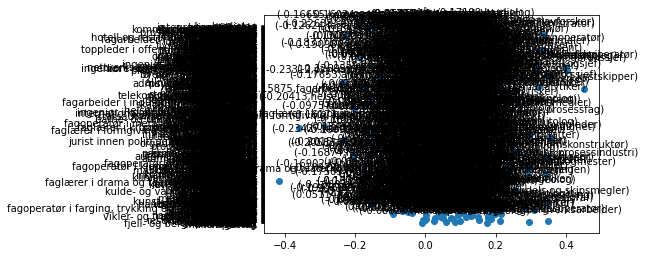

In [11]:
import matplotlib.pyplot as plt
import numpy as np

    
plt.scatter(df['Diff'],df['Yrke'], )
plt.rcParams["figure.figsize"] = (80,80)

for x,y in zip(df['Diff'],df['Yrke']):
    label = f"({round(x,5)},{y})"
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.show()